In [5]:


def extract_text_from_file(file_path):  # ✅ valid syntax
    with open(file_path, "r") as f:
        text = f.read()
    return text

# Now call the function like this:
file_text = extract_text_from_file("/content/UpdatedResumeDataSet.csv")
print(file_text)

Category,Resume
Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigation

In [6]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

# Load CSV
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")

# Preprocess resume text
X = df['Resume'].apply(lambda x: re.sub(r'\W+', ' ', str(x).lower()))

# Labels: 'category'
y = df['Category']

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_vec = vectorizer.fit_transform(X)

# Train/test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save model and vectorizer
joblib.dump(model, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("✅ Model and vectorizer saved!")


✅ Model and vectorizer saved!


In [7]:
import pandas as pd
import joblib
import re

# ✅ Load trained model and vectorizer
model = joblib.load("model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# ✅ Define evaluation function using model & vectorizer
def evaluate_resume(text):
    cleaned = re.sub(r'\W+', ' ', str(text).lower())
    features = vectorizer.transform([cleaned])
    prediction = model.predict(features)[0]
    return prediction

# ✅ Load dataset
df = pd.read_csv("UpdatedResumeDataSet.csv")

# ✅ Confirm column name
print("📌 Available columns:", df.columns)

# ✅ Apply prediction (adjust if column name is 'Resume' with capital R)
df['Category'] = df['Resume'].apply(evaluate_resume)

# ✅ Save result
df.to_csv("evaluated_resumes.csv", index=False)
print("✅ Predictions saved to evaluated_resumes.csv")

# ✅ Optional: show few predictions
print(df[['Resume', 'Category']].head())


📌 Available columns: Index(['Category', 'Resume'], dtype='object')
✅ Predictions saved to evaluated_resumes.csv
                                              Resume      Category
0  Skills * Programming Languages: Python (pandas...  Data Science
1  Education Details \r\nMay 2013 to May 2017 B.E...  Data Science
2  Areas of Interest Deep Learning, Control Syste...  Data Science
3  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...  Data Science
4  Education Details \r\n MCA   YMCAUST,  Faridab...  Data Science


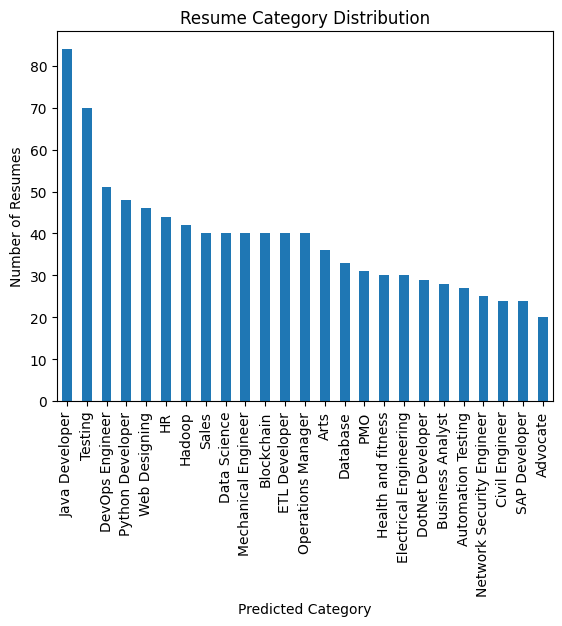

In [8]:
import matplotlib.pyplot as plt

df = pd.read_csv("evaluated_resumes.csv")
df['Category'].value_counts().plot(kind='bar', title='Resume Category Distribution')
plt.xlabel("Predicted Category")
plt.ylabel("Number of Resumes")
plt.show()



In [10]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# --- Code to Add ---

# Print a full report including precision for each category
print("Classification Report:")
print(classification_report(y_test, y_pred))

# To get just the overall weighted precision score
# from sklearn.metrics import precision_score
# precision = precision_score(y_test, y_pred, average='weighted')
# print(f"Overall Weighted Precision: {precision:.4f}")

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00  

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

✅ Model Accuracy: 99.48%

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
            